In [1]:
# Part 1: Data Loading and Overview

import pandas as pd

# Load the dataset
file_path = 'C:/Users/User/Desktop/ecommerce.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Encoding specified to handle special characters

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Print column names
print("\nColumn Names:")
print(df.columns.tolist())

# Print data types
print("\nData Types:")
print(df.dtypes)

# Print shape
print("\nDataset Shape:")
print(df.shape)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Print basic statistics for numeric columns
print("\nBasic Statistics for Numeric Columns:")
print(df.describe())


First 5 rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom



Column Names:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Data Types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Dataset Shape:
(541909, 8)

Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Basic Statistics for Numeric Columns:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000  

In [2]:
# Part 2: Data Cleaning and Feature Engineering

import pandas as pd
import numpy as np

# Assuming df is already loaded from Part 1

# Drop rows with missing CustomerID or Description
df_cleaned = df.dropna(subset=['CustomerID', 'Description'])

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Remove rows with Quantity <= 0 or UnitPrice <= 0
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Add Revenue column
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Extract features from InvoiceDate
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.day_name()
df_cleaned['WeekNumber'] = df_cleaned['InvoiceDate'].dt.isocalendar().week
df_cleaned['IsWeekend'] = df_cleaned['InvoiceDate'].dt.dayofweek >= 5  # Saturday=5, Sunday=6

# Save the cleaned dataset
cleaned_file_path = 'C:/Users/User/Desktop/ecommerce_cleaned.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print("Data cleaning and feature engineering completed. Cleaned data saved to ecommerce_cleaned.csv.")


Data cleaning and feature engineering completed. Cleaned data saved to ecommerce_cleaned.csv.


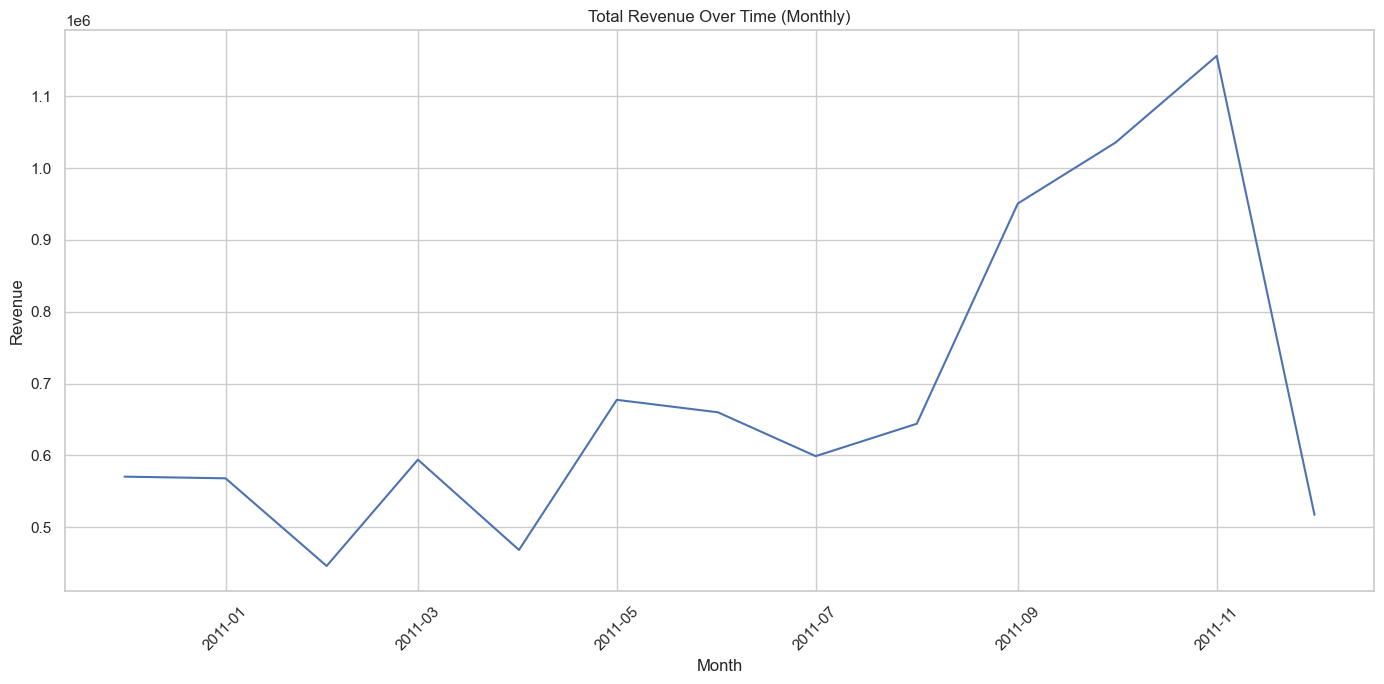

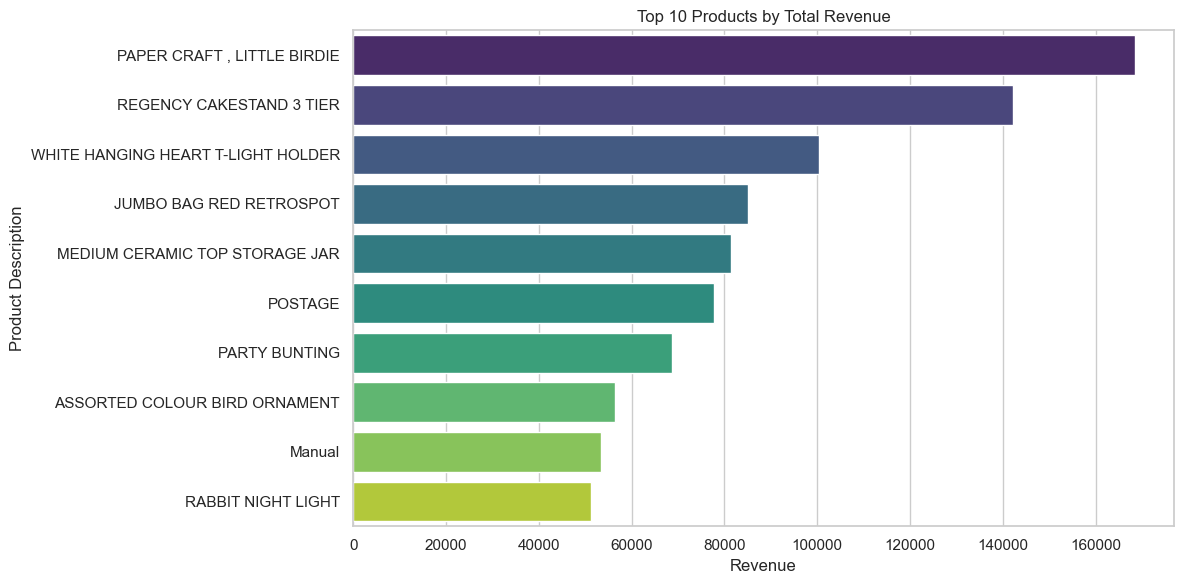

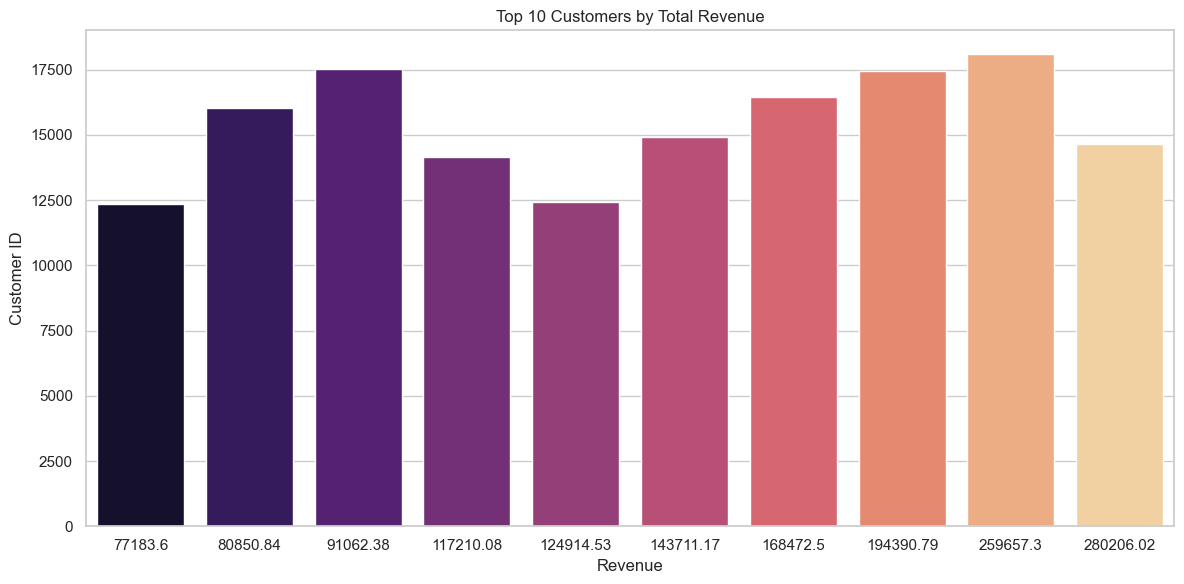

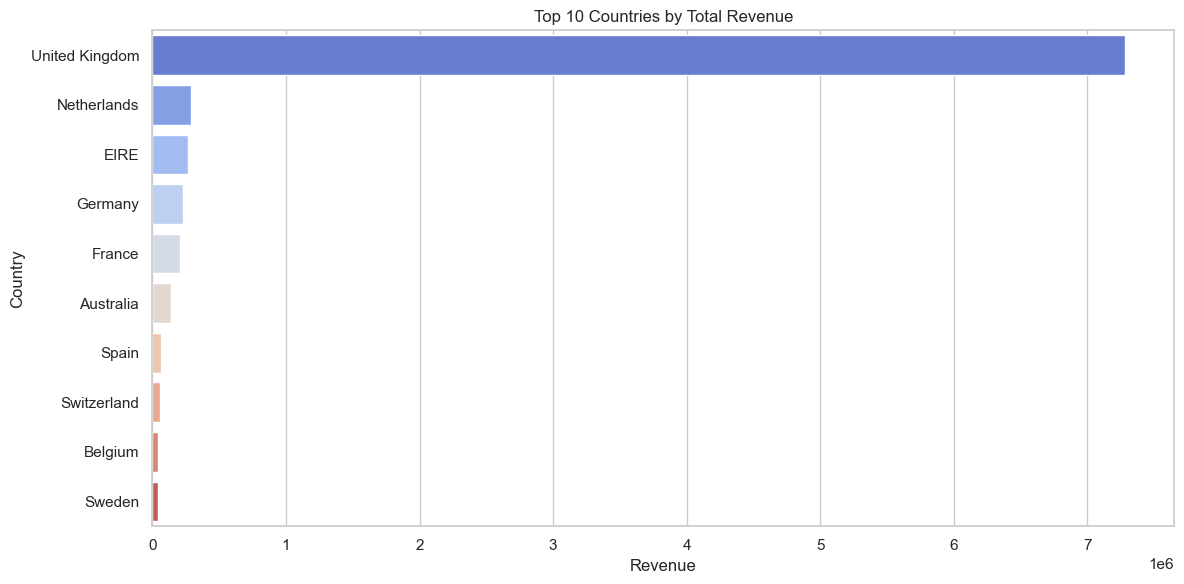

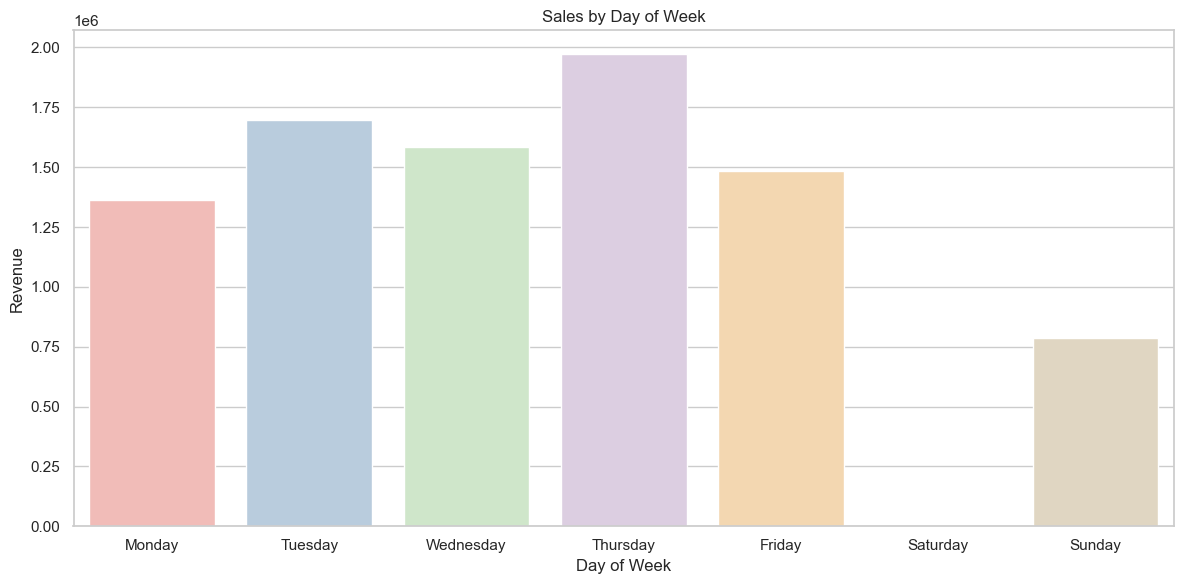

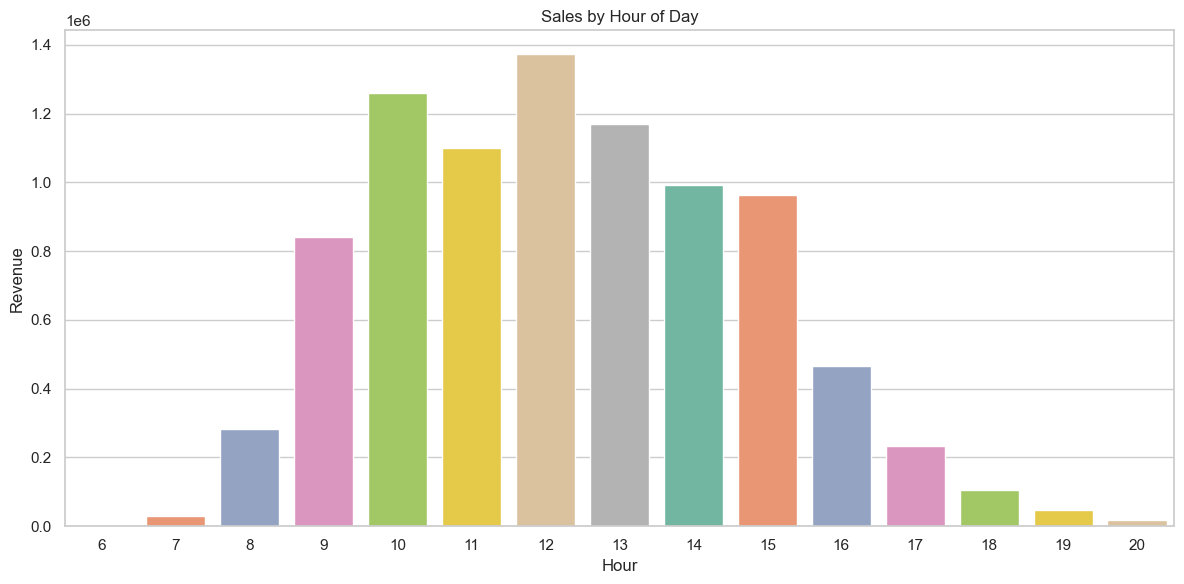

No returned products found in the dataset (Quantity < 0).


In [3]:
# Part 3: Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
cleaned_file_path = 'C:/Users/User/Desktop/ecommerce_cleaned.csv'
df = pd.read_csv(cleaned_file_path, parse_dates=['InvoiceDate'])

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Plot total revenue over time (monthly)
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('MonthYear')['Revenue'].sum().reset_index()
monthly_revenue['MonthYear'] = monthly_revenue['MonthYear'].dt.to_timestamp()

plt.figure(figsize=(14,7))
sns.lineplot(x='MonthYear', y='Revenue', data=monthly_revenue)
plt.title('Total Revenue Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top 10 products by total revenue
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Revenue', y='Description', data=top_products, palette='viridis')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

# 3. Top 10 customers by total revenue
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Revenue', y='CustomerID', data=top_customers, palette='magma')
plt.title('Top 10 Customers by Total Revenue')
plt.xlabel('Revenue')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

# 4. Top 10 countries by total revenue
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Revenue', y='Country', data=top_countries, palette='coolwarm')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# 5. Sales by Day of Week
# Ensure the order of days is correct
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_dow = df.groupby('DayOfWeek')['Revenue'].sum().reindex(days_order).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='DayOfWeek', y='Revenue', data=sales_dow, palette='Pastel1')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# 6. Sales by Hour of Day
sales_hour = df.groupby('Hour')['Revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Hour', y='Revenue', data=sales_hour, palette='Set2')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# 7. Most Returned Products (Quantity < 0)
returned_products = df[df['Quantity'] < 0]

if not returned_products.empty:
    top_returned = returned_products.groupby('Description')['Quantity'].sum().sort_values().head(10).reset_index()
    
    plt.figure(figsize=(12,6))
    sns.barplot(x='Quantity', y='Description', data=top_returned, palette='Oranges')
    plt.title('Top 10 Most Returned Products')
    plt.xlabel('Total Returned Quantity')
    plt.ylabel('Product Description')
    plt.tight_layout()
    plt.show()
else:
    print("No returned products found in the dataset (Quantity < 0).")
    
    # Alternative approach: Check for returns based on InvoiceNo starting with 'C'
    # Uncomment the following lines if returns are indicated differently
    """
    returned_products_alt = df[df['InvoiceNo'].astype(str).str.startswith('C')]
    if not returned_products_alt.empty:
        top_returned_alt = returned_products_alt.groupby('Description')['Quantity'].sum().sort_values().head(10).reset_index()
        
        plt.figure(figsize=(12,6))
        sns.barplot(x='Quantity', y='Description', data=top_returned_alt, palette='Oranges')
        plt.title('Top 10 Most Returned Products (Based on InvoiceNo)')
        plt.xlabel('Total Returned Quantity')
        plt.ylabel('Product Description')
        plt.tight_layout()
        plt.show()
    else:
        print("No returned products found based on InvoiceNo starting with 'C'.")
    """


RFM Table:


,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Segment,CustomerSegment
0,12346.0,326,1,77183.60,Low,Low,High,LowLowHigh,Low-Value
1,12347.0,2,7,4310.00,High,High,High,HighHighHigh,High-Value
2,12348.0,75,4,1797.24,Medium,Medium,High,MediumMediumHigh,Medium-Value
3,12349.0,19,1,1757.55,High,Low,High,HighLowHigh,Low-Value
4,12350.0,310,1,334.40,Low,Low,Low,LowLowLow,Low-Value


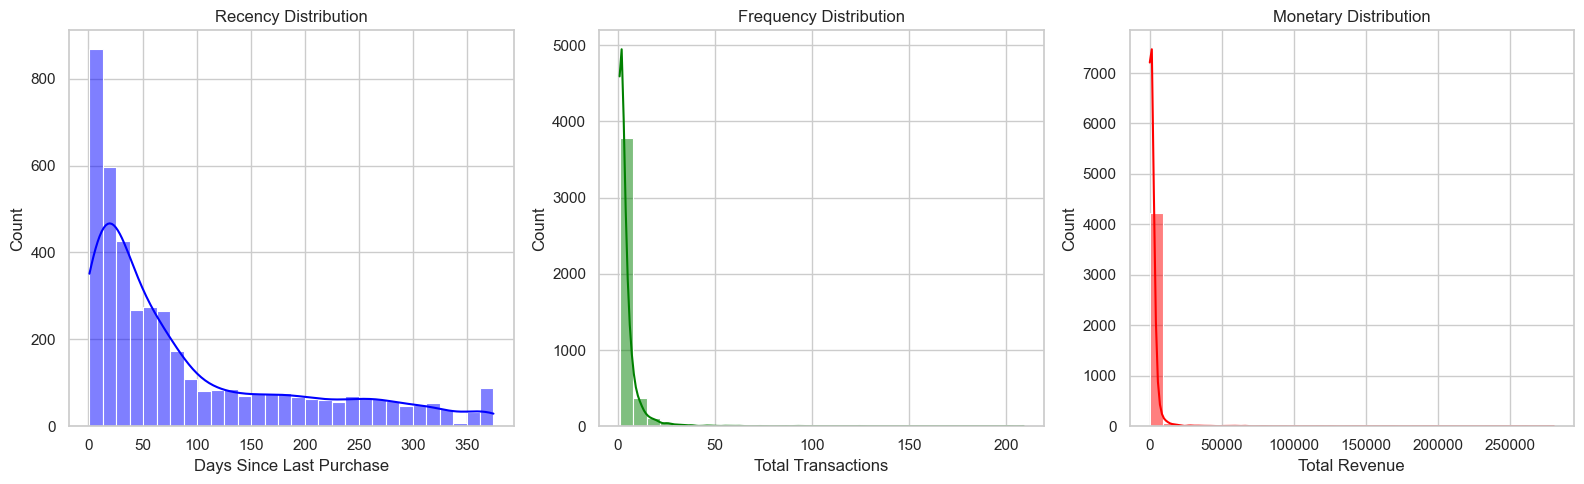

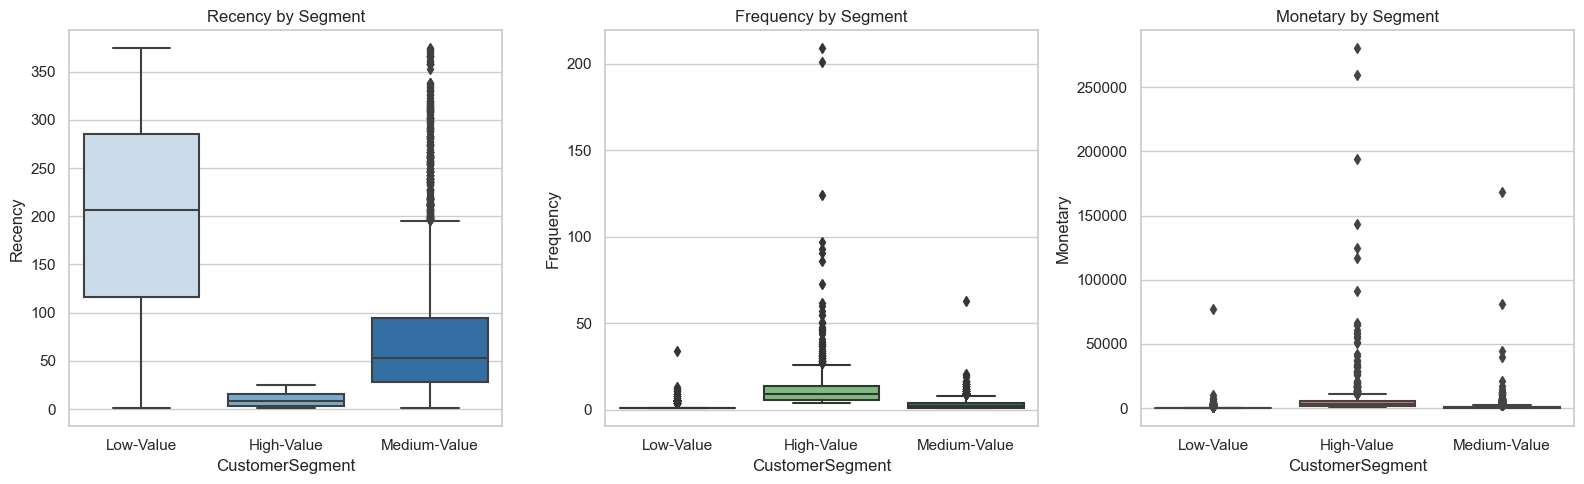

In [4]:
# Part 4: RFM Analysis (Customer Segmentation)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the cleaned dataset
cleaned_file_path = 'C:/Users/User/Desktop/ecommerce_cleaned.csv'
df = pd.read_csv(cleaned_file_path, parse_dates=['InvoiceDate'])

# Define analysis date as the day after the last purchase
analysis_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Revenue': 'sum'  # Monetary
}).reset_index()

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Revenue': 'Monetary'
}, inplace=True)

# Define RFM segmentation thresholds
rfm['RecencyScore'] = pd.qcut(rfm['Recency'], 3, labels=['High', 'Medium', 'Low'])
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'].rank(method='first'), 3, labels=['Low', 'Medium', 'High'])
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], 3, labels=['Low', 'Medium', 'High'])

# Combine RFM scores
rfm['RFM_Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

# Simplified segmentation
def segment(row):
    if row['RecencyScore'] == 'High' and row['FrequencyScore'] == 'High' and row['MonetaryScore'] == 'High':
        return 'High-Value'
    elif row['RecencyScore'] == 'Medium' or row['FrequencyScore'] == 'Medium' or row['MonetaryScore'] == 'Medium':
        return 'Medium-Value'
    else:
        return 'Low-Value'

rfm['CustomerSegment'] = rfm.apply(segment, axis=1)

# Display RFM table
print("RFM Table:")
display(rfm.head())

# Visualize RFM distributions
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=30, kde=True, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=30, kde=True, color='green')
plt.title('Frequency Distribution')
plt.xlabel('Total Transactions')

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins=30, kde=True, color='red')
plt.title('Monetary Distribution')
plt.xlabel('Total Revenue')

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.boxplot(x='CustomerSegment', y='Recency', data=rfm, palette='Blues')
plt.title('Recency by Segment')

plt.subplot(1,3,2)
sns.boxplot(x='CustomerSegment', y='Frequency', data=rfm, palette='Greens')
plt.title('Frequency by Segment')

plt.subplot(1,3,3)
sns.boxplot(x='CustomerSegment', y='Monetary', data=rfm, palette='Reds')
plt.title('Monetary by Segment')

plt.tight_layout()
plt.show()


No NaN values found in Revenue.


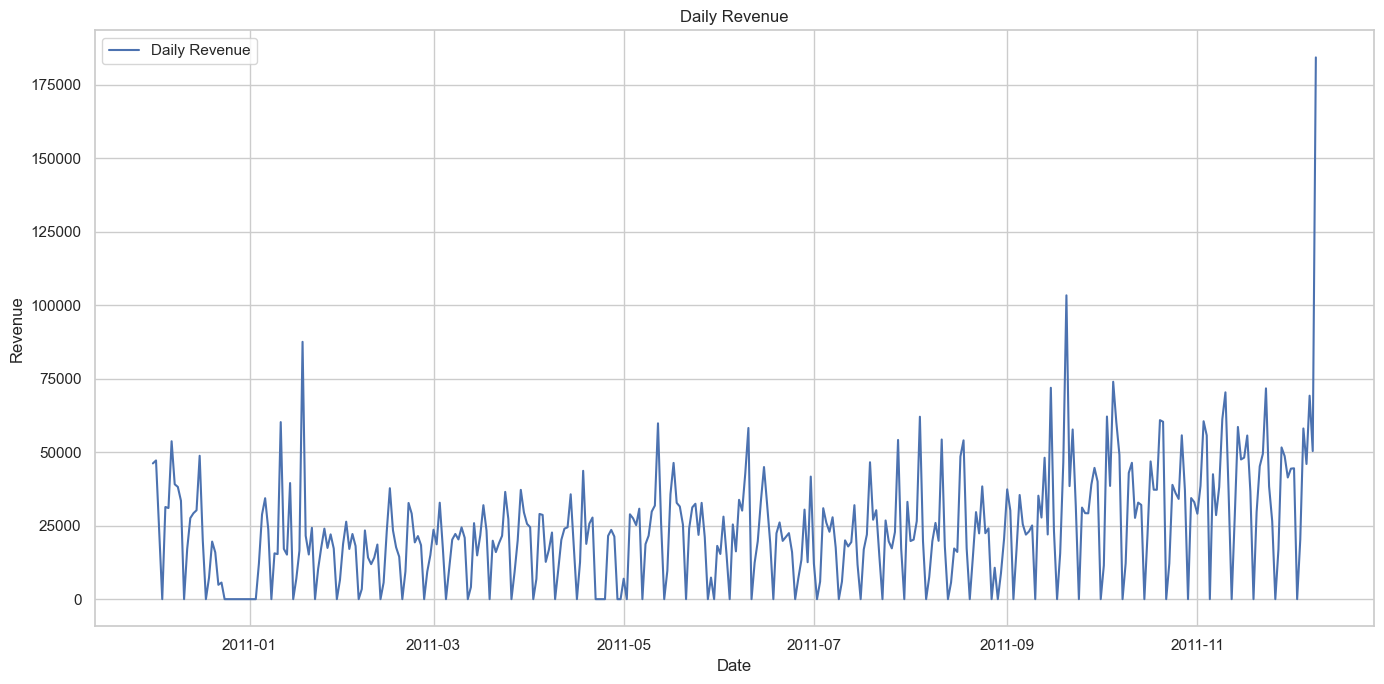

ADF Statistic: -0.9259530729126515
p-value: 0.7793056074569279
The time series is non-stationary. Differencing may be required.
                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  299
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3285.132
Date:                Sun, 15 Dec 2024   AIC                           6582.264
Time:                        15:12:17   BIC                           6604.446
Sample:                             0   HQIC                          6591.143
                                - 299                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5417      0.050    -10.941      0.000      -0.639      -0.445
ar.

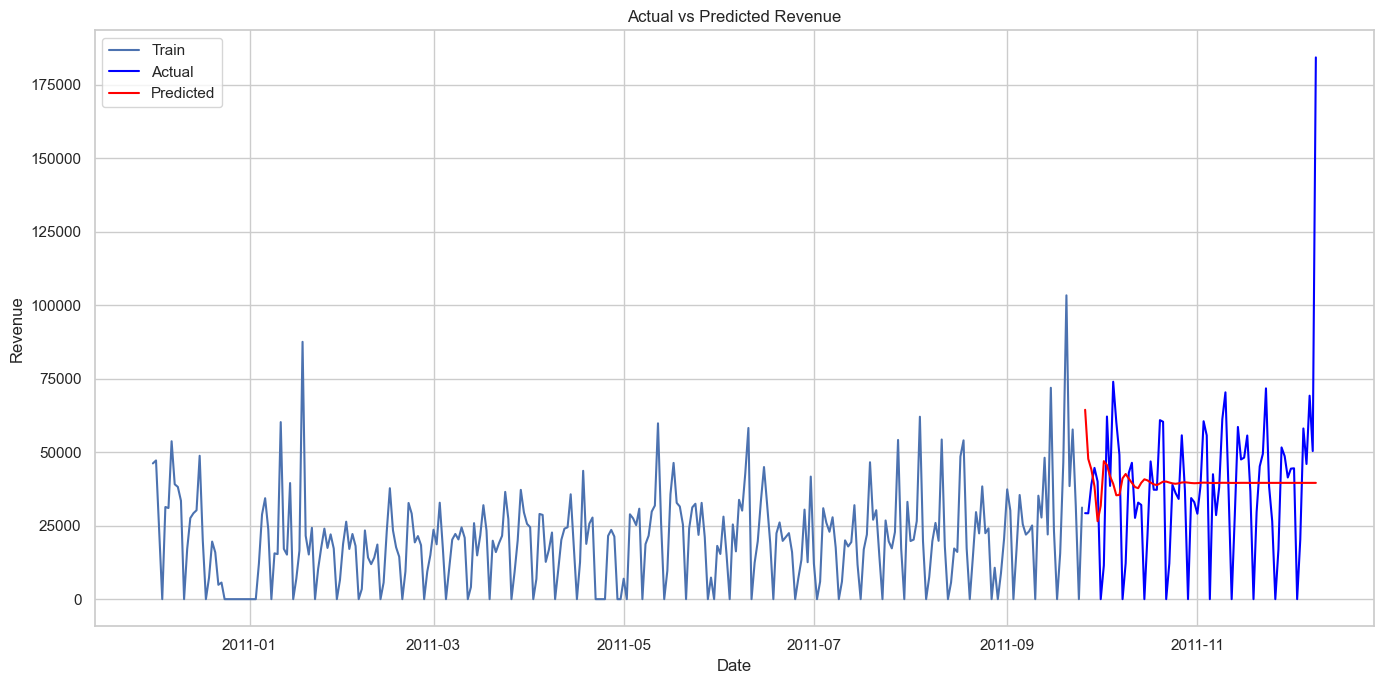

No NaN values found in future forecast.


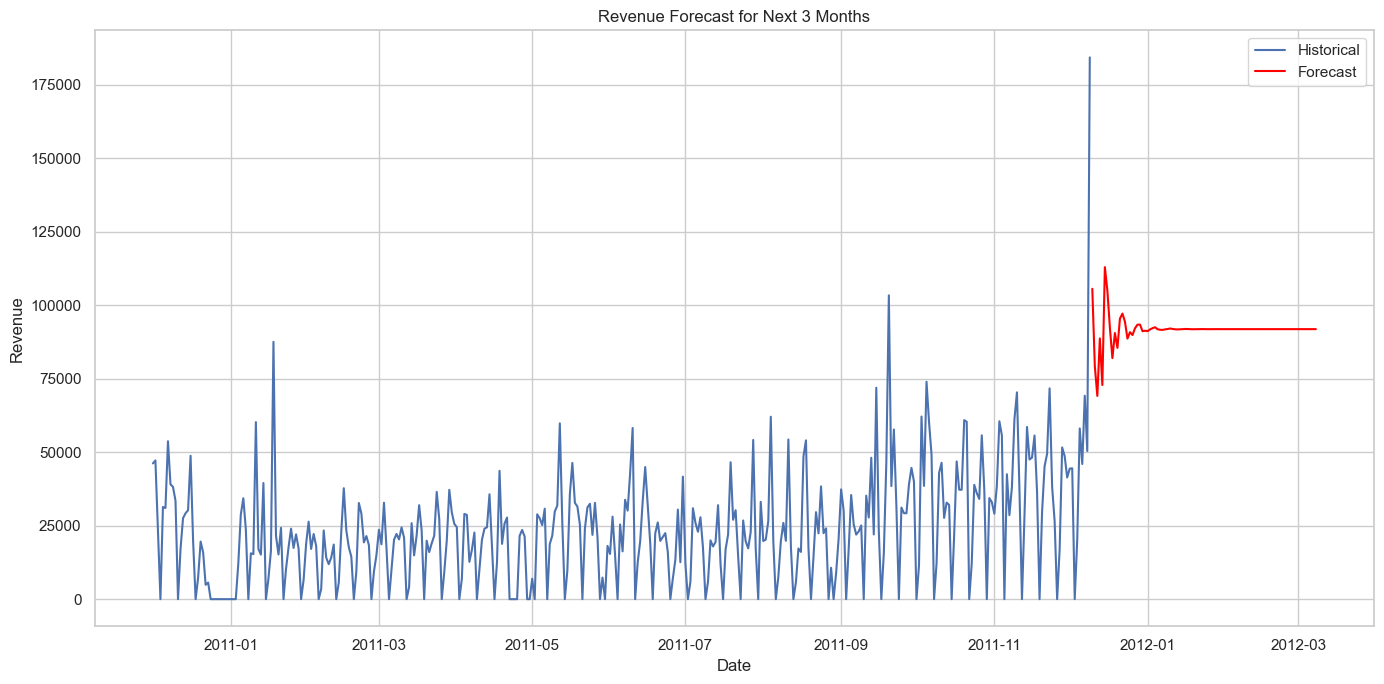

In [5]:
# Part 5: Sales Forecasting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Load the cleaned dataset
cleaned_file_path = 'C:/Users/User/Desktop/ecommerce_cleaned.csv'
df = pd.read_csv(cleaned_file_path, parse_dates=['InvoiceDate'])

# Aggregate total revenue daily
daily_revenue = df.set_index('InvoiceDate').resample('D')['Revenue'].sum().reset_index()

# Fill any missing dates with Revenue = 0
daily_revenue = daily_revenue.set_index('InvoiceDate').asfreq('D').fillna(0).reset_index()

# Verify if there are any NaN values in Revenue
if daily_revenue['Revenue'].isnull().sum() > 0:
    daily_revenue['Revenue'].fillna(0, inplace=True)
    print("Filled NaN values in Revenue with 0.")
else:
    print("No NaN values found in Revenue.")

# Plot daily revenue
plt.figure(figsize=(14,7))
plt.plot(daily_revenue['InvoiceDate'], daily_revenue['Revenue'], label='Daily Revenue')
plt.title('Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.tight_layout()
plt.show()

# Check for stationarity using ADF Test
result = adfuller(daily_revenue['Revenue'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary. Differencing may be required.")

# Split data into train and test (80/20)
train_size = int(len(daily_revenue) * 0.8)
train, test = daily_revenue.iloc[:train_size], daily_revenue.iloc[train_size:]

# ARIMA Model
# Determine order (p,d,q) - for simplicity, we'll set d=1
# You may need to adjust p and q based on ACF and PACF plots
model = ARIMA(train['Revenue'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Check for NaN values in forecast
if forecast.isnull().sum() > 0:
    forecast.fillna(0, inplace=True)
    print("Filled NaN values in forecast with 0.")
else:
    print("No NaN values found in forecast.")

# Align forecast index with test dates
forecast.index = test['InvoiceDate']

# Ensure test['Revenue'] and forecast have the same length
if len(test['Revenue']) != len(forecast):
    min_len = min(len(test['Revenue']), len(forecast))
    test_revenue = test['Revenue'].iloc[:min_len].reset_index(drop=True)
    forecast = forecast.iloc[:min_len].reset_index(drop=True)
    print(f"Truncated test and forecast to {min_len} samples for alignment.")
else:
    test_revenue = test['Revenue']

# Verify there are no NaNs before calculating metrics
if test_revenue.isnull().sum() > 0 or forecast.isnull().sum() > 0:
    print("There are still NaN values in test or forecast. Filling them with 0.")
    test_revenue.fillna(0, inplace=True)
    forecast.fillna(0, inplace=True)

# Evaluate performance
rmse = sqrt(mean_squared_error(test_revenue, forecast))
mae = mean_absolute_error(test_revenue, forecast)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Plot Actual vs Predicted
plt.figure(figsize=(14,7))
plt.plot(train['InvoiceDate'], train['Revenue'], label='Train')
plt.plot(test['InvoiceDate'], test['Revenue'], label='Actual', color='blue')
plt.plot(test['InvoiceDate'], forecast, label='Predicted', color='red')
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.tight_layout()
plt.show()

# Forecast future sales for next 3 months (90 days)
future_steps = 90  # Approximately 3 months
model_final = ARIMA(daily_revenue['Revenue'], order=(5,1,0))
model_final_fit = model_final.fit()
future_forecast = model_final_fit.forecast(steps=future_steps)

# Check for NaN values in future_forecast
if future_forecast.isnull().sum() > 0:
    future_forecast.fillna(0, inplace=True)
    print("Filled NaN values in future forecast with 0.")
else:
    print("No NaN values found in future forecast.")

# Generate future dates
last_date = daily_revenue['InvoiceDate'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps, freq='D')

# Create a DataFrame for future forecast
future_forecast_df = pd.DataFrame({
    'InvoiceDate': future_dates,
    'Forecasted_Revenue': future_forecast.values
})

# Plot future forecast
plt.figure(figsize=(14,7))
plt.plot(daily_revenue['InvoiceDate'], daily_revenue['Revenue'], label='Historical')
plt.plot(future_forecast_df['InvoiceDate'], future_forecast_df['Forecasted_Revenue'], label='Forecast', color='red')
plt.title('Revenue Forecast for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.tight_layout()
plt.show()
